# Interpolate

In [1]:
from smpl import plot
from smpl import stat
from smpl import interpolate
import numpy as np

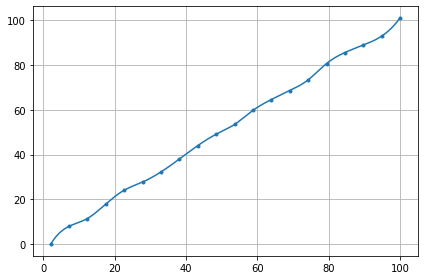

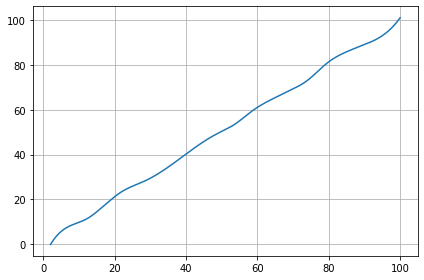

In [2]:
x = np.linspace(2,100,20)
y = stat.noisy(x)
plot.data(x,y,interpolate=True)
plot.show()
plot.data(x,y,interpolate=True,also_data=False)
plot.show()

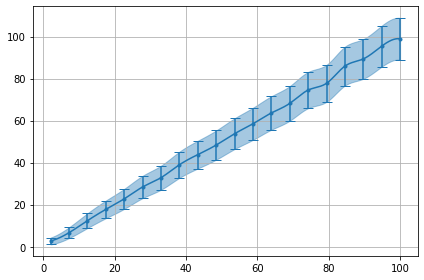

 array([  2.        ,   2.0980981 ,   2.1961962 ,   2.29429429,
          2.39239239,   2.49049049,   2.58858859,   2.68668669,
          2.78478478,   2.88288288,   2.98098098,   3.07907908,
          3.17717718,   3.27527528,   3.37337337,   3.47147147,
          3.56956957,   3.66766767,   3.76576577,   3.86386386,
          3.96196196,   4.06006006,   4.15815816,   4.25625626,
          4.35435435,   4.45245245,   4.55055055,   4.64864865,
          4.74674675,   4.84484484,   4.94294294,   5.04104104,
          5.13913914,   5.23723724,   5.33533534,   5.43343343,
          5.53153153,   5.62962963,   5.72772773,   5.82582583,
          5.92392392,   6.02202202,   6.12012012,   6.21821822,
          6.31631632,   6.41441441,   6.51251251,   6.61061061,
          6.70870871,   6.80680681,   6.9049049 ,   7.003003  ,
          7.1011011 ,   7.1991992 ,   7.2972973 ,   7.3953954 ,
          7.49349349,   7.59159159,   7.68968969,   7.78778779,
          7.88588589,   7.98398398,   8.

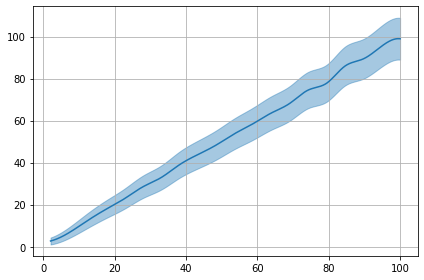

In [3]:
x = np.linspace(2,100,20)
y = stat.poisson_dist(stat.noisy(x))
plot.data(x,y,interpolate=True,sigmas=1,show=True)
plot.data(x,y,interpolate=True,sigmas=1,also_data=False)